В этом ноутбуке:
- Генерируем синтетические данные (blobs)
- Обучаем MyKMeans и MyDBSCAN из ML_LIB
- Сравниваем со sklearn.KMeans и sklearn.DBSCAN
- Считаем метрики (ARI, NMI, Silhouette)
- Визуализируем результаты кластеризации

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

from MyKMeans import MyKMeans
from MyDBSCAN import MyDBSCAN

from sklearn.cluster import KMeans, DBSCAN

In [4]:
# Датасет
X, y_true = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=1.0, random_state=42)

results = []

In [10]:
# --- MyKMeans ---
km = MyKMeans(n_clusters=3, max_iter=300, n_init=10, random_state=42)
km.fit(pd.DataFrame(X))
labels = km.predict(pd.DataFrame(X))
results.append({
    'model':'MyKMeans',
    'ARI':adjusted_rand_score(y_true,labels),
    'NMI':normalized_mutual_info_score(y_true,labels),
    'Silhouette':silhouette_score(X,labels)
})

In [8]:
# --- sklearn KMeans ---
sk_km = KMeans(n_clusters=3, n_init=10, random_state=42)
sk_km.fit(X)
labels = sk_km.labels_
results.append({
    'model':'sklearn.KMeans',
    'ARI':adjusted_rand_score(y_true,labels),
    'NMI':normalized_mutual_info_score(y_true,labels),
    'Silhouette':silhouette_score(X,labels)
})

In [12]:
# --- MyDBSCAN ---
try:
    db = MyDBSCAN(eps=1.0, min_samples=5)
    db.fit(pd.DataFrame(X))
    labels = db.predict(pd.DataFrame(X))
    if len(set(labels)) > 1:
        sil = silhouette_score(X, labels)
    else:
        sil = None
    results.append({
        'model':'MyDBSCAN',
        'ARI':adjusted_rand_score(y_true,labels),
        'NMI':normalized_mutual_info_score(y_true,labels),
        'Silhouette':sil
    })
except Exception as e:
    print("MyDBSCAN not available or failed:", e)

In [14]:
# --- sklearn DBSCAN ---
sk_db = DBSCAN(eps=1.0, min_samples=5)
sk_db.fit(X)
labels = sk_db.labels_
if len(set(labels)) > 1:
    sil = silhouette_score(X, labels)
else:
    sil = None
results.append({
    'model':'sklearn.DBSCAN',
    'ARI':adjusted_rand_score(y_true,labels),
    'NMI':normalized_mutual_info_score(y_true,labels),
    'Silhouette':sil
})

In [16]:
# Таблица результатов
results_df = pd.DataFrame(results)
print("Сравнение моделей:")
print(results_df.round(4))

Сравнение моделей:
            model    ARI     NMI  Silhouette
0        MyKMeans  1.000  1.0000      0.8438
1  sklearn.KMeans  1.000  1.0000      0.8438
2        MyKMeans  1.000  1.0000      0.8438
3        MyDBSCAN  0.991  0.9831      0.8027
4  sklearn.DBSCAN  0.991  0.9831      0.8027


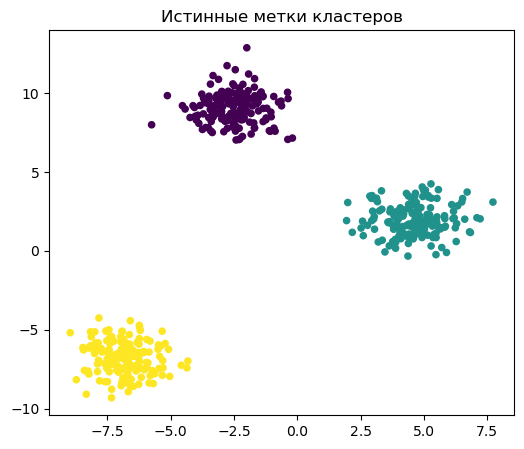

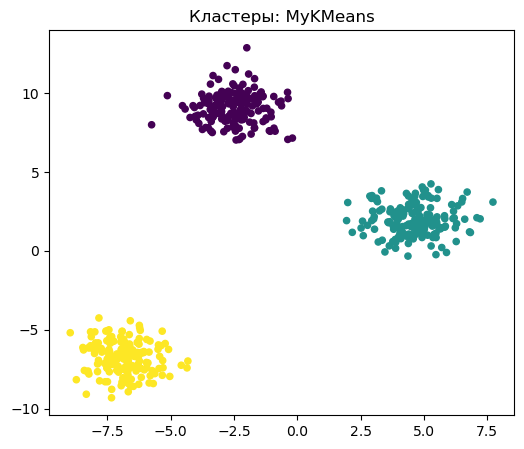

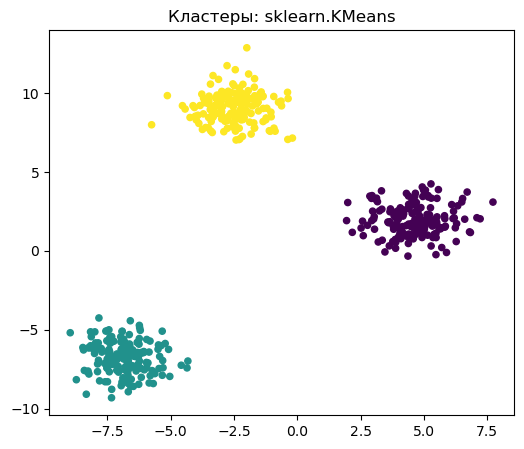

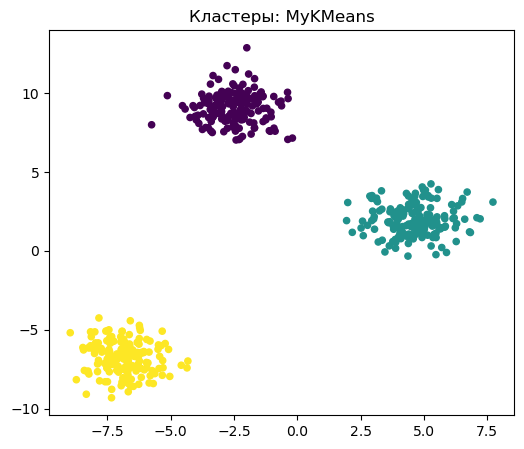

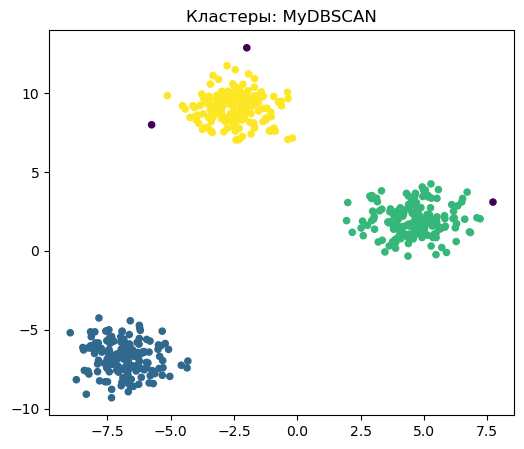

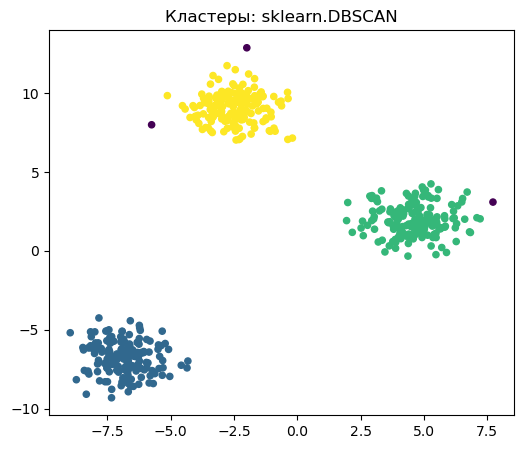

In [18]:
# --- Визуализации ---

# Истинные кластеры
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y_true, cmap='viridis', s=20)
plt.title("Истинные метки кластеров")
plt.show()

# Визуализация кластеров для каждой модели
for i, row in results_df.iterrows():
    model_name = row['model']
    if model_name == 'MyKMeans':
        labels = km.predict(pd.DataFrame(X))
    elif model_name == 'sklearn.KMeans':
        labels = sk_km.labels_
    elif model_name == 'MyDBSCAN':
        try:
            labels = db.predict(pd.DataFrame(X))
        except:
            continue
    elif model_name == 'sklearn.DBSCAN':
        labels = sk_db.labels_
    else:
        continue

    plt.figure(figsize=(6,5))
    plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=20)
    plt.title(f"Кластеры: {model_name}")
    plt.show()